# Tree-Based Methods

## Conceptual

#### 1. Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting.

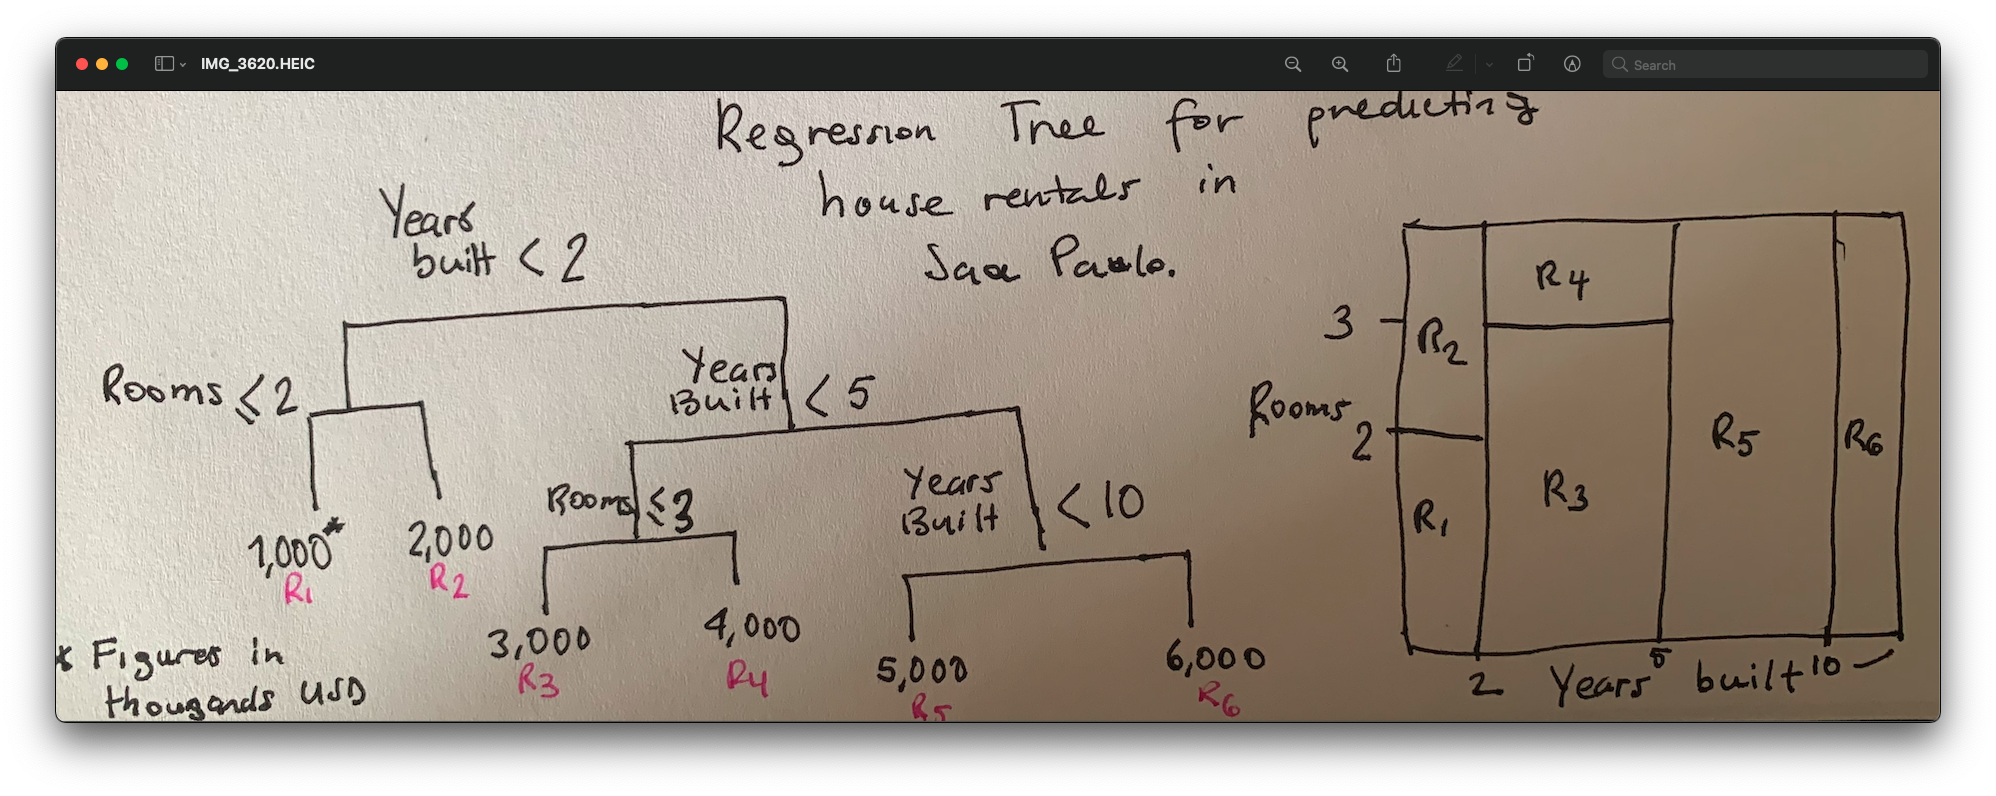 

----

#### 2. Explain why boosting using depth-one trees (stumps) leads to an additive model.

**Answer:**

It leads to an additive model because a complicated classifier can be framed as a linear combination or sum of several depth-one trees (i.e. stumps). Therefore, it's said that boosting combines weak classifiers into a powerful one. The final model is composed by adding the shrunken version of each model one after the other.

Source: http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/boosting.pdf

----

#### 3. Gini, Entropy and Error Rate

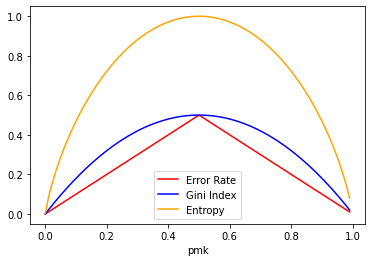

In [37]:
"""
K is assumed to be 2.
"""
import matplotlib.pyplot as plt
import numpy as np

# pm1 = np.linspace(0,1,50) didn't work with np.maximum()
pm1 = np.arange(0.0001, 1.0, 0.01) # If 0 instead of 0.0001, python throws an error due to log2(0)
E = 1 - np.maximum(pm1, 1-pm1) # Classification Error Rate
G = pm1*(1-pm1) + (1-pm1)*pm1 # Gini
D = -(pm1*np.log2(pm1) + (1-pm1)*np.log2(1-pm1)) # Entropy

plt.xlabel("pmk")
plt.plot(pm1, E, color="red", label="Error Rate")
plt.plot(pm1, G, color="blue", label="Gini Index")
plt.plot(pm1, D, color="orange", label="Entropy")
plt.legend()
plt.show()

**Intuition:** In a regression tree, the RSS (i.e. Residual Sum of Squares) is usually used as a criterion for making the binary splits, in the classification setting the criterion is different. The *classification error rate* is the preferred option for the splitting process. In a few words, this figure is the fraction of the training observations in a specific region that don't belong to the most common class.

The variable **pmk** is the proportion of the training observations in the mth region that belong to the kth class. Nonetheless, since the classification error is not sensible enough for tree-growing, two alternative measures are considered.

The **Gini index** describes the total variance across the K classes. It's usually employed as a measure of node purity: a small value suggests that a node contains a majority of observations from a single class.

Both Gini and Entropy are preferred over the Classifcation Error Rate to evaluate the quality of a particular split. On the other hand, the latter is mostly used if prediction accuracy of the final pruned tree is the goal.

____

#### 4. This question relates to the plots in Figure 8.12.

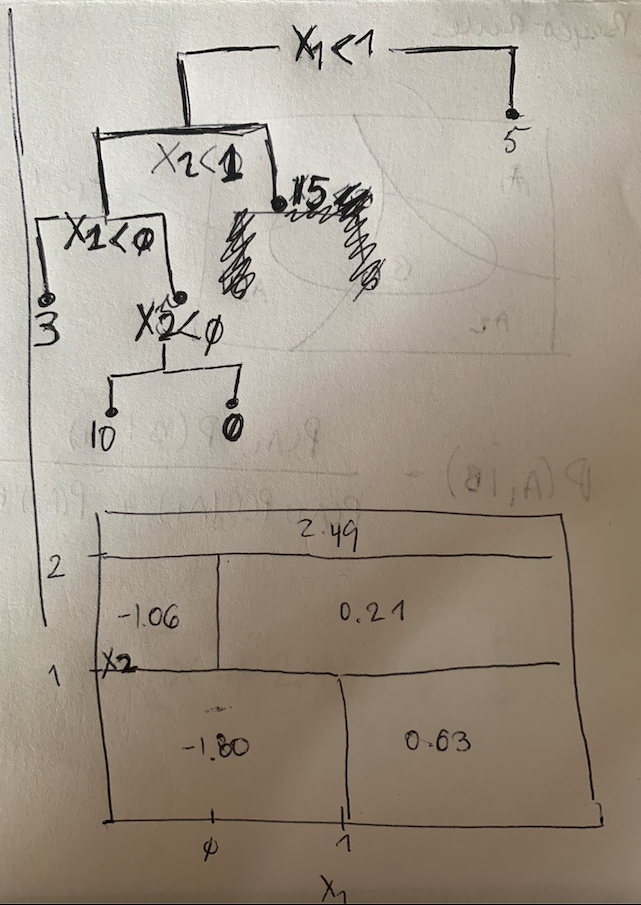

____

#### 5. Suppose we produce ten boostraped samples from a data set containing ...

**Majority Vote**

Since P(Red|X) = 0.1 leads to Green (i.e. 1 - 0.1 = 0.9 for Green), following a similar approach we have: Total Red = 6, Total Green = 4. Therefore, the final classification is *Red*.

**Average Probability**

(0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10 = 0.45, thus P(Red|X) = *0.45* leads to a final classification of *Green*.

____

#### 6. Provide a detailed explanation of the algorithm that is used to fit a regression tree.

**Answer:**

We begin by dividing the predictor space (i.e. X1, X2, ... Xp) into *J* distinct and non-overlapping regions, R1, R2, ..., Rj. For every observation that falls into a specific region (e.g. Region 3 or R3), we predict a value equivalent to the mean of the values that belong to that region.

In order to construct the regions we use **recurse binary splitting**, which is a top-down greedy approach that begins at the top of the tree and successively splits the predictor space. It's *greedy* because at each step of the process, the best split is made at that specific step, instead of looking ahead and picking a split that will generate a better tree in a future step. To perform recursive binary splitting we look for *the best predictor* and *the best cutpoint* that minimize the Residual Sum of Squares (*RSS*) within each of the resulting regions. As we advance forward, instead of splitting the entire predictor space, we split one of the two previously identified regions. We now have tree regions. We continue splitting one of these three regions further while minimizing the RSS. This process continues until a stopping criterion is reached. Once the regions have been created we predict the response for a test observation using the mean of the training observations in the particular region where the test observation belongs.

This process might be too complex leading to overfitting however, thus a smaller tree with fewer splits (i.e. fewer regions) might lead to a lower variance and better interpretation even when generating some bias. The recommended strategy is to grow a very large tree and then *prune* it back obtaining a *subtree*. The best way to select a subtree is to choose the one that leads to the lowest test error rate. We do this by *Cost complexity pruning*, where we consider a sequence of trees indexed by a nonnegative tuning parameter which controls the trade-off between the subtree's complexity and its fit to the training data. We select the value of this tuning parameter by cross-validation, then we return to the full data set and obtain the subtree corresponding to this tuning parameter.